In [172]:
cd

/mnt/disk2/samarth


In [173]:
cd qdPy/output_files/mdi

/mnt/disk2/samarth/qdPy/output_files/mdi


In [175]:
data = np.loadtxt('../../data_files/hmi.6328.36')
smax = 11
asig_data_280 = data[2056, 48:84]

ac_dpt = np.load(f'dpt-ac-00.280.{smax}.150.npy')[1::2]
ac_qdpt = []
for s in range(1, smax+2, 2):
    ac_qdpt.append(np.load(f'qdpt-ac-00.280.{s}.150.npy')[1::2])

Text(0, 0.5, '(a_s - a_s^{DPT})/sigma')

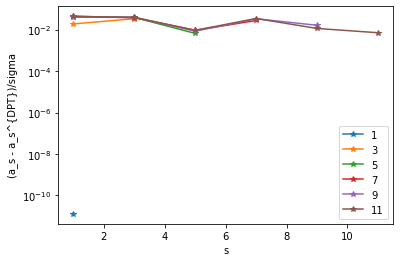

In [176]:
for i in range(len(ac_qdpt)):
    s = 2*i+1
    plt.semilogy(np.arange(1, s+2, 2), 
                 abs(ac_qdpt[i][:(s//2+1)] - ac_dpt[:(s//2+1)])/asig_data_280[:(s//2+1)], 
                 '*-', label=f'{s}')
plt.legend()
plt.xlabel('s')
plt.ylabel(f'(a_s - a_s^{{DPT}})/sigma')

Text(0, 0.5, '(a_s - a_s^{ref})/sigma')

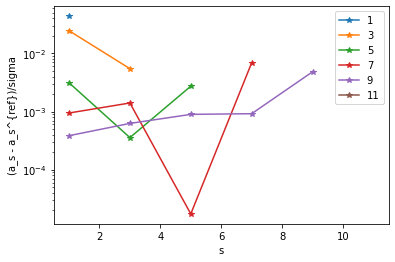

In [177]:
for i in range(len(ac_qdpt)):
    s = 2*i+1
    plt.semilogy(np.arange(1, s+2, 2), 
                 abs(ac_qdpt[i][:(s//2+1)] - ac_qdpt[-1][:(s//2+1)])/asig_data_280[:(s//2+1)], 
                 '*-', label=f'{s}')
plt.legend()
plt.xlabel('s')
plt.ylabel(f'(a_s - a_s^{{ref}})/sigma')

In [165]:
wsr = np.loadtxt('../../data_files/w_s/wsr.mdi')
r = np.load('../../r.npy')

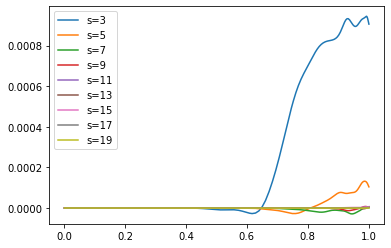

In [166]:
for s in range(3, 20, 2):
    sind = s//2 
    plt.plot(r, -wsr[sind][1:-1], label=f's={s}')
plt.legend()
plt.show()

In [138]:
supmat3 = np.load('supmat_qdpt_00.280.3.150.npy')
supmat5 = np.load('supmat_qdpt_00.280.5.150.npy')
supmat7 = np.load('supmat_qdpt_00.280.7.150.npy')


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.sparse as sparse
from mpl_toolkits.axes_grid1 import make_axes_locatable

Loading the largest supermatrix for s = 11
Loading the largest supermatrix for s = 9
Loading the largest supermatrix for s = 7
Loading the largest supermatrix for s = 5
Loading the largest supermatrix for s = 3
Loading the largest supermatrix for s = 1


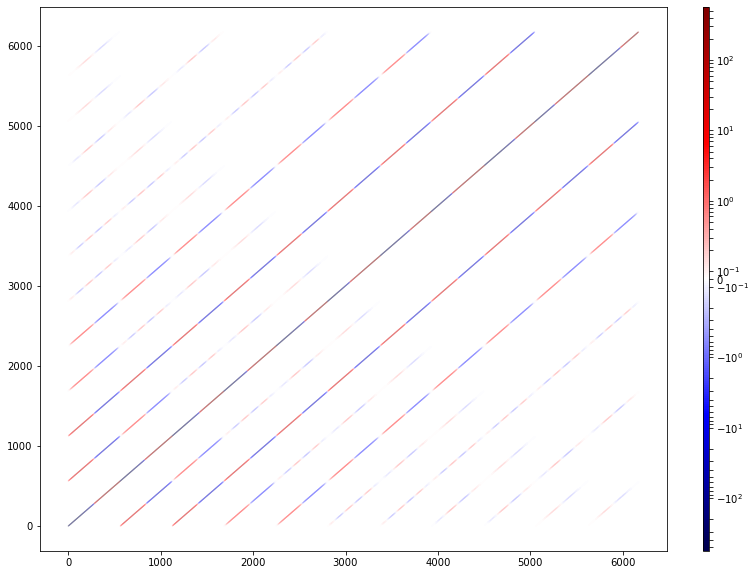

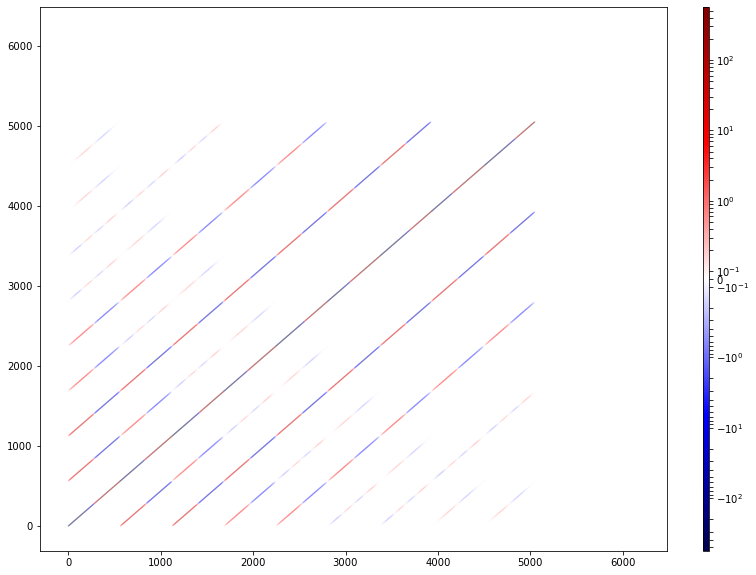

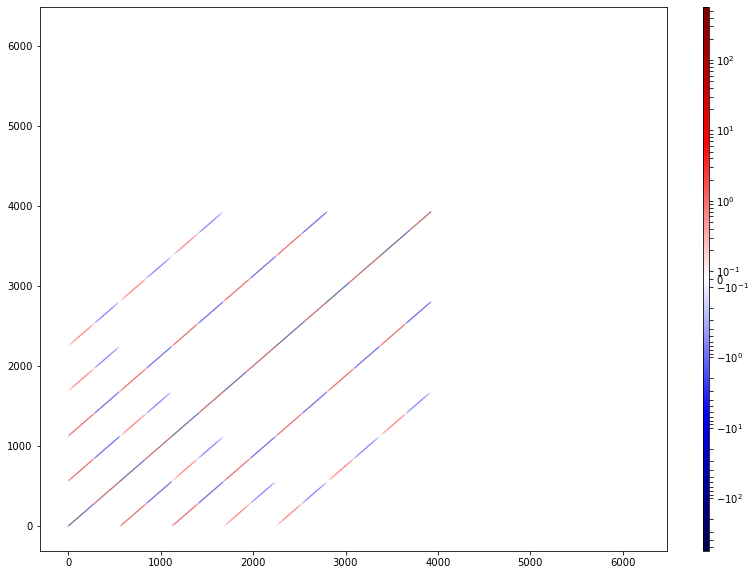

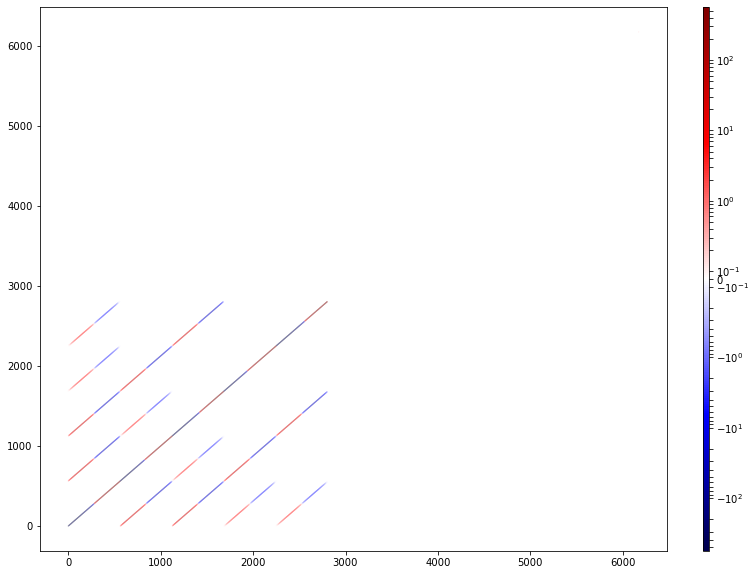

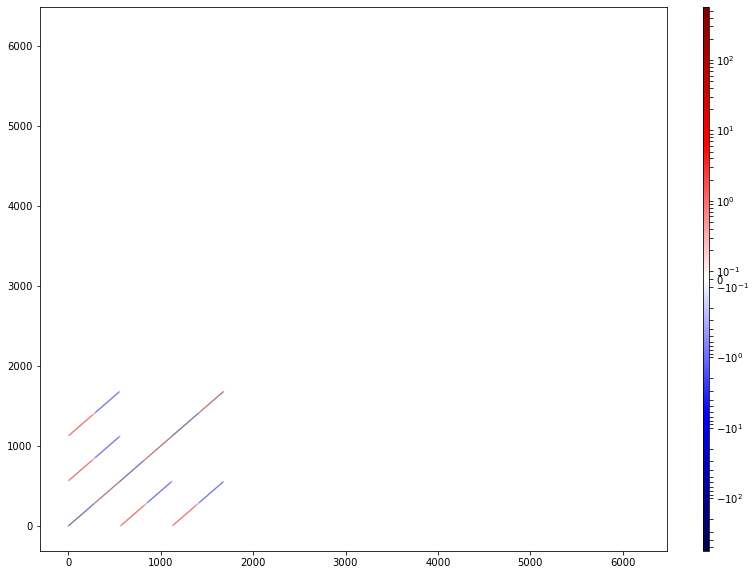

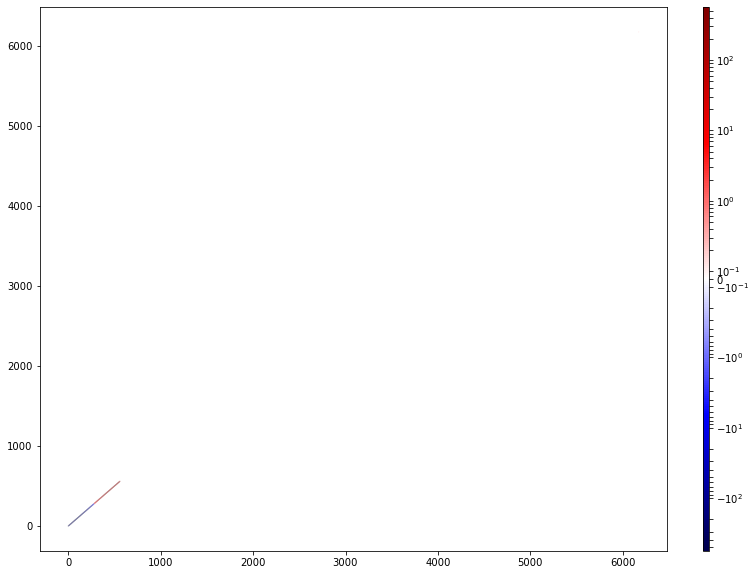

In [154]:
for i in range(11, 0, -2):
    print(f'Loading the largest supermatrix for s = {i}')
    supmat = np.load(f'supmat_qdpt_00.280.{i}.150.npy').real

    if(i == 11):
        supmat_largedim = supmat.shape[0]
        z = supmat
    else:
        z = np.zeros((supmat_largedim, supmat_largedim))
        supmat_dim = supmat.shape[0]
        z[:supmat_dim, :supmat_dim] = supmat
        
    if i == 7:
        supmat7 = supmat * 1.0
    if i == 5:
        supmat5 = supmat * 1.0

    #just something dummy to plot the whole matrix                                             
    z[-1,-1] = 1

    sp = sparse.coo_matrix(z)
    rows, cols, data = sp.row, sp.col, sp.data

    fig, ax = plt.subplots(1, 1, figsize=(12,10))

    im = ax.scatter(rows, cols, c=data, s=1e-3, cmap='seismic',
                    norm = colors.SymLogNorm(linthresh=1e-1,
                                             linscale=1e-1,
                                             vmin = 561,
                                             vmax = -561))
                     # vmin=-8, vmax=3.5)                                                      
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.5)

    fig.colorbar(im, cax=cax)

In [158]:
abs(supmat7[:2805, :2805] - supmat5).sum()

0.0